# Predicting diabetes

## Importing libraries

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# do plotting inline instead of separate window
%matplotlib inline


## load and review data

In [12]:
df = pd.read_csv("./data/pima-data.csv")


In [14]:
df.shape  #number of rows and of cols
df.head(10) #show first ten rows

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,True
1,1,85,66,29,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,0,23.3,0.672,32,0.0000,True
3,1,89,66,23,94,28.1,0.167,21,0.9062,False
4,0,137,40,35,168,43.1,2.288,33,1.3790,True
5,5,116,74,0,0,25.6,0.201,30,0.0000,False
6,3,78,50,32,88,31.0,0.248,26,1.2608,True
7,10,115,0,0,0,35.3,0.134,29,0.0000,False
8,2,197,70,45,543,30.5,0.158,53,1.7730,True
9,8,125,96,0,0,0.0,0.232,54,0.0000,True


In [15]:
#or also the last records
df.tail(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
763,10,101,76,48,180,32.9,0.171,63,1.8912,False
764,2,122,70,27,0,36.8,0.340,27,1.0638,False
765,5,121,72,23,112,26.2,0.245,30,0.9062,False
766,1,126,60,0,0,30.1,0.349,47,0.0000,True
767,1,93,70,31,0,30.4,0.315,23,1.2214,False


In [17]:
df.isnull().values.any()

False

In [19]:
# use matplot to detect correlated columns by cross-plotting
def plot_corr(df, size=10):
    """
    Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot

    Displays:
        matrix of correlation between columns.  Blue-cyan-yellow-red-darkred => less to more correlated
                                                0 ------------------>  1
                                                Expect a darkred line running from top left to bottom right
    """

    corr = df.corr()    # data frame correlation function
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)   # color code the rectangles by correlation value
    plt.xticks(range(len(corr.columns)), corr.columns)  # draw x tick marks
    plt.yticks(range(len(corr.columns)), corr.columns)  # draw y tick marks


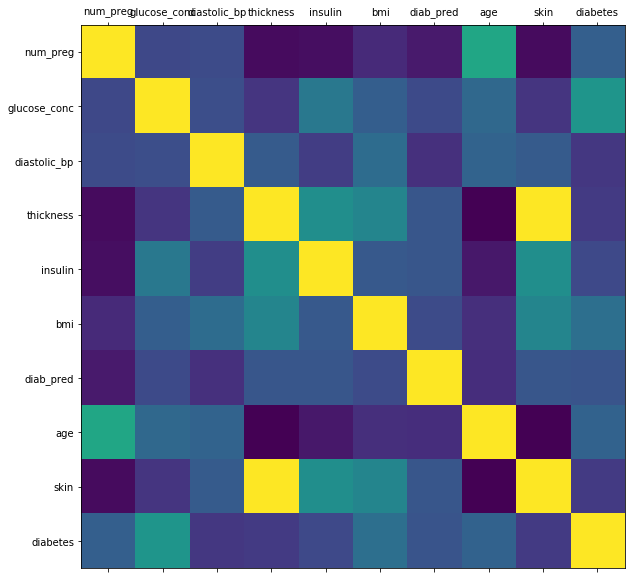

In [20]:
plot_corr(df)

In [21]:
df.corr()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
num_preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,-0.081672,0.221898
glucose_conc,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.057328,0.466581
diastolic_bp,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.207371,0.065068
thickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,1.000000,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.436783,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.392573,0.292695
diab_pred,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.183928,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,-0.113970,0.238356
skin,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,1.000000,0.074752
diabetes,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,0.074752,1.000000


In [22]:
# we find that the skin and thickness columns are correlated, 
# this is especially noticeable when the feature 's value is 0
# so we delete skin column
del df['skin']

In [23]:
# and verify by checking the head again
df.head(3)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,True
1,1,85,66,29,0,26.6,0.351,31,False
2,8,183,64,0,0,23.3,0.672,32,True


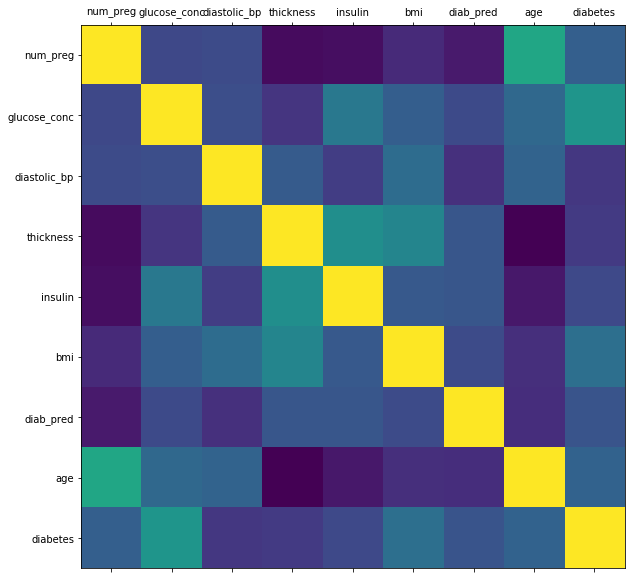

In [25]:
# plot again to see if corrleation has been done away with
plot_corr(df)

## Check data types 

Now we can move on to molding the data, which means:

* adjusting data types
* creating new columns if necessary

For many algorithms all values have to be numerical, so often we need to change booleans to 0 and 1, as below:


In [26]:
bool_map = {True: 1, False: 0}
# map the col again
df['diabetes'] = df['diabetes'].map(bool_map)

In [27]:
# check again if data has been converted 
df.head(3)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


## Data distribution

Another important thing is to ensure that the data is dsitributed well enough to allow us to use the data to train the algorithm. Bear in mind that **predicting rare events with accuracy is difficult**. (black swans etc. this is well documented and very interestingly described in the work of Nassim Taleb). The change of having rare events in our training data is low, or they would not be rare events at all.

## Check true/false ratios

In [31]:
num_T = len(df.loc[df['diabetes'] == True])
num_F = len(df.loc[df['diabetes'] == False])
print("Number of True cases:  {0} ({1:2.2f}%)".format(num_T,(num_T/ (num_T + num_F))*100))
print("Number of False cases: {0} ({1:2.2f}%)".format(num_F,(num_F/ (num_T + num_F))*100))


Number of True cases:  268 (34.90%)
Number of False cases: 500 (65.10%)


with 35% we can reasonably expect to train the model well. There are other special advanced techniques for trying to predict things that do not happen that very often. With these ratios we can use standard prediction techniques.

Now that we have performed several manipulations, it is important to state that we always need to **track how the data was manipulated**. A lot of the data manipulation in ML is actually trial and error. When we manipulate the data, it is very easy to **change the meaning of the data**, especially unintentionally. These Jupyter notebooks are useful for tracking everything we do to the data. Python interpreter interaction is stored via code cells. Documentation in markdown, such as this one.

# Selecting the algorithm

Use your problem domain knowledge to select the initial algo. This is where the initial problem statement we did will help us filter the search for the algo, if it was done well enough. In ML it will often be the case that the initial algo is not the right one and we will have to go through the workflow several times, therefore training and evaluation multiple algos.

## Role of the Algorithm

Naturally, the algo is what drives the entire process, but there are two phases, training and real use case. We use the algo both to create and use a trained model. When in training, when the training function (a.k.a. "fit") is called, the algo executes its logic and processes the training set. The resulting analysis is evaluated against a mathematical model and logic associated with the algo. Then the algo uses this analysis to produce a model that best fits the data in the training dataset. Now the fit parameters are stored and the model is now said to be trained. 

Now comes real use and the model is called via the prediction function (a.k.a. "predict") and real data is passed to the model, which uses its code and parameter values to produce a result.

## Algorithm selection

There are plenty of available algorithms. Scikit-learn for example contains more than 50 and more are being created. 

There are several factors to take into account initially to select an algo

* Learning Type (supervised or not)

* Result we want (results are divided between *regression* and *classification*) - *Regression* means continuous values, such as prices, whereas *classification* implies discrete values. Many algos support both kinds of results.

* Complexity, eliminate "ensemble" algos, which are container algos with multiple child algos under the surface. These are more often used to tune and boost performance; also they tend to be difficult to diagnose and debug.

* Basic vs enhanced algorithm; enhanced algos are variations of basic algos, often for performance imprvements, additional functionality, and thus they tend to be more complex.


So, for this example we are basically down to three classic options

* Naive Bayes, based on Bayes' theorem of likelihood and probability. Every feature has the same weight. Requires less data and allows for fast conversions. Looks at nearby values to estimate probability. It is simple to understand and train, and fast too, as other algorithms can take 100x times to train. This algo is stable to changes to the data.
* Logistic Regression. In spite of the name implying continuous values (regression), this is a binary result algo. It measures the relationship of each feture and weights them on their impact on the result. The resultant value is mapped against a curve
* Decision Tree





## Training

We want to make sure to do the training with the minimun features possible, this makes the training go faster. We will use scikit-learn.

We will also split the data 70%-30% and never use the test data for training.


In [35]:
# split the data

# this is deprecated
# from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
 

feature_col_names = ['num_preg', 'glucose_conc', 'diastolic_bp', 'thickness', 'insulin', 'bmi', 'diab_pred', 'age']
predicted_col_names = ['diabetes']

x = df[feature_col_names].values
y = df[predicted_col_names].values
split_test_size =0.3


X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size = split_test_size, random_state = 42)






cehck that we have the desired 70% 30% train vs test split of the data

In [36]:
print("{0:0.2f}% in training set".format((len(X_train) / len(df.index))*100))
print("{0:0.2f}% in test set".format((len(X_test) / len(df.index))*100))


69.92% in training set
30.08% in test set


But we also need to ensure there is a good split of true and false cases, not a skewed one
(code missing yet)

## Post-split data preparation

Perform data transformation post-split separately on the test and train datasets to ensure they remain separate.

#### find hidden missing values

Sometimes a 0 is actually a missing value. Are 0 values possible? How many rows do have these 0s? Which ones are really an issue? This is when a domain expert can come in handy.



In [38]:
print("Rows in the data frame {0}", format(len(df)))
print("Rows missing glucose_conc: {0}".format(len(df.loc[df['glucose_conc'] == 0])))
print("Rows missing diastolic_bp: {0}".format(len(df.loc[df['diastolic_bp'] == 0])))
# and so on for the rest of the rows

Rows in the data frame {0} 768
Rows missing glucose_conc: 5
Rows missing diastolic_bp: 35


Missing data is a common problem. We can ignore, drop the rows, replace the values (impute). Imputing is a common option, either by replacing with mean, median etc or replacing with a value derived expert domain knowledge 

#### impute with the mean

In [41]:
from sklearn.preprocessing import Imputer

fill_0 = Imputer(missing_values = 0, strategy="mean", axis=0)

X_train = fill_0.fit_transform(X_train)
X_test = fill_0.fit_transform(X_test)


# Train the initial algo, Naive Bayes

In [42]:
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()

nb_model.fit(X_train, Y_train.ravel())

GaussianNB(priors=None)

### Performance on training data

In [44]:
# predict values using the training data
nb_predict_train = nb_model.predict(X_train)
# for this we can use the metrics library
from sklearn import metrics

print("Accuracy {0:.4f}".format(metrics.accuracy_score(Y_train, nb_predict_train)))
print()

#gives us over 70% accuracy

Accuracy 0.7542



### Performance on testing data

In [45]:
# predict values using the training data
nb_predict_test = nb_model.predict(X_test)
# for this we can use the metrics library
from sklearn import metrics

print("Accuracy {0:.4f}".format(metrics.accuracy_score(Y_test, nb_predict_test)))
print()

#gives us over 70% accuracy as well

Accuracy 0.7359



#### Metrics

how did we really get to these numbers

In [46]:
print ("Confusion matrix")
# labels for 1 = True and 0 = False 
print("{0}".format(metrics.confusion_matrix(Y_test, nb_predict_test, labels=[1,0])))
print("")

print("Classification report")
print(metrics.classification_report(Y_test, nb_predict_test, labels=[1,0]))




Confusion matrix
[[ 52  28]
 [ 33 118]]

Classification report
             precision    recall  f1-score   support

          1       0.61      0.65      0.63        80
          0       0.81      0.78      0.79       151

avg / total       0.74      0.74      0.74       231



### Understanding the results and the matrix

the results are 

                TP FP
                FN TN

where TP = true positive (actual diabetes and predicted to be diabetes), FN is false negative (actual diabetes, but predicted to be not diabetes), FP = false positive (actual not diabetes but predicted to be diabetes), TN = true negative (actual not diabetes and predicted to be not diabetes) 

in a perfect world we would get 0 instead of the 28 and the 33

#### recall

recall is the true positive rate, which basically tells us how well the model predicts diabetes. Recall is calculated as follows: TP / ( TP + FN ). In this case we have .65, but we should aspire to get > 70%

#### precision

The positive predictor value, that is, how often a patient gets diabetes when the model said they would: confirmation. It is TP / ( TP / + FP ). We would like to increase that number too as that would mean fewer false positives.





## Improving performance

There are several strategies

* adjust current algo (via hyperparameters), but our naive bayes does not have such paraemters
* get more data or improve it
* improve the training
* switch to another algo


Let's try *Random Forest*

### Random Forest

RF is an ensemble algo, based on decision trees. It creates mutiple such trees and fits multiple trees with subsets of the data. Then the results of the trees are averaged in order to improve performance and control the risk of overfitting, as that is a tendency with tree algorithms.

Let's train the RF

In [47]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state = 42)
rf_model.fit(X_train, Y_train.ravel())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=42,
            verbose=0, warm_start=False)

In [48]:
# now check accuracy

rf_predict_train = rf_model.predict(X_train)
print("Accuracy {0:.4f}".format(metrics.accuracy_score(Y_train, rf_predict_train )))

Accuracy 0.9870


With the test data we got very good accuracy. Let's see the test data

In [49]:
rf_predict_test = rf_model.predict(X_test)
print("Accuracy {0:.4f}".format(metrics.accuracy_score(Y_test, rf_predict_test )))

Accuracy 0.7100


In [50]:
print ("Confusion matrix")
# labels for 1 = True and 0 = False 
print("{0}".format(metrics.confusion_matrix(Y_test, rf_predict_test, labels=[1,0])))
print("")

print("Classification report")
print(metrics.classification_report(Y_test, rf_predict_test, labels=[1,0]))

Confusion matrix
[[ 43  37]
 [ 30 121]]

Classification report
             precision    recall  f1-score   support

          1       0.59      0.54      0.56        80
          0       0.77      0.80      0.78       151

avg / total       0.70      0.71      0.71       231



Now the results are not that good on the test data. Recall is too low, and so is precision. This seems a classic example of ***overfitting***. This results from a decision boundary that is too complex, that is, a boundary that fits too well the data distribution in the training set, but that would not work nearly as well on the test set, or any other real-world data with a different distribution.

### How to fix overfitting

One option is the use of **Hyperparameters**, that define how the algo operates and learns. There is one specific param that affects overfitting, usually called *regularization*, which specifies to what extent the algo should focus on every corner case of the training data ( value dampening ).

Another mechanism to reduce overfitting is **Cross Validation**. 

Both options can be used at the same time.

Accuracy with both training and testing data is often called the ***bias-variance trade-off***, something that must be considered in almost all supervised ML algos. We need to sacrifice some perfection in traning in order to get better overall performance with test and real world datasets.

### Let's try something simpler now, Logistic Regression

We can not only switch to more complex algorithms, but also to simpler ones. Logistic Regression is simple in form but performs well in many classification scenarios.

In [53]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(C=0.7, random_state=42)# 0.7 as regularization param here is only a starting guess
lr_model.fit(X_train, Y_train.ravel())


lr_predict_test = lr_model.predict(X_test)
print("Accuracy {0:.4f}".format(metrics.accuracy_score(Y_test, lr_predict_test )))


print ("Confusion matrix")
# labels for 1 = True and 0 = False 
print(metrics.confusion_matrix(Y_test, lr_predict_test, labels=[1,0]))
print("")

print("Classification report")
print(metrics.classification_report(Y_test, lr_predict_test, labels=[1,0]))



Accuracy 0.7446
Confusion matrix
[[ 44  36]
 [ 23 128]]

Classification report
             precision    recall  f1-score   support

          1       0.66      0.55      0.60        80
          0       0.78      0.85      0.81       151

avg / total       0.74      0.74      0.74       231



Promising but not good enough. Let's set a regularization parameter in a loop and try to see which value returns the best recall value.

1st max value of 0.613 found at C = 1.400


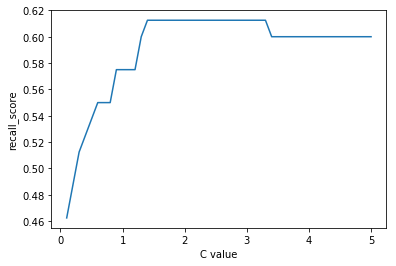

In [59]:
C_start= 0.1
C_end = 5
C_inc = 0.1

C_values, recall_scores = [], []

C_val = C_start
best_recall_score = 0

while(C_val < C_end):
    C_values.append(C_val)
    lr_model_loop = LogisticRegression(C=C_val, random_state=42)
    lr_model_loop.fit(X_train, Y_train.ravel())
    lr_predict_loop_test = lr_model_loop.predict(X_test)
    recall_score = metrics.recall_score(Y_test, lr_predict_loop_test )
    recall_scores.append(recall_score)
    if(recall_score > best_recall_score):
        best_recall_score = recall_score
        best_lr_predict_test = lr_predict_loop_test
        
    C_val = C_val + C_inc


best_score_C_val = C_values[recall_scores.index(best_recall_score)]

print("1st max value of {0:.3f} found at C = {1:.3f}".format(best_recall_score, best_score_C_val))

%matplotlib inline
plt.plot(C_values, recall_scores, "-")
plt.xlabel("C value")
plt.ylabel("recall_score")

Still not getting a recall value over .7 !!

Our data had more non-diabetes than diabetes results. This could cause an imbalance issue. Unfortunately *unbalanced classes* are very common in datasets. So we need to understand how to fix them.

### Fix unbalanced classes

THese occur when we have more of one class result than of the other, such as diabetes vs non-diabetes here, where we had 35% and 65% respectively. Seems like a big imbalance. This can decrease the performance of an algorithm. However, the algo can include another parameter to compensate for this class imbalance. Manipulating this parameter changes the decision boundary. We need to enable this in our algo here.

#### Logistic regression with class_weight='balanced'

1st max value of 0.738 found at C = 0.300


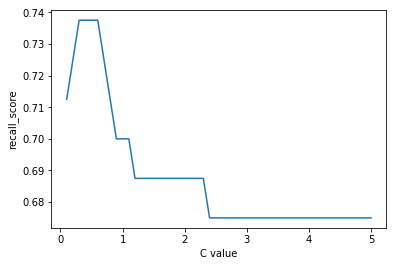

In [60]:
C_start= 0.1
C_end = 5
C_inc = 0.1

C_values, recall_scores = [], []

C_val = C_start
best_recall_score = 0

while(C_val < C_end):
    C_values.append(C_val)
    lr_model_loop = LogisticRegression(C=C_val, class_weight="balanced", random_state=42)
    lr_model_loop.fit(X_train, Y_train.ravel())
    lr_predict_loop_test = lr_model_loop.predict(X_test)
    recall_score = metrics.recall_score(Y_test, lr_predict_loop_test )
    recall_scores.append(recall_score)
    if(recall_score > best_recall_score):
        best_recall_score = recall_score
        best_lr_predict_test = lr_predict_loop_test
        
    C_val = C_val + C_inc


best_score_C_val = C_values[recall_scores.index(best_recall_score)]

print("1st max value of {0:.3f} found at C = {1:.3f}".format(best_recall_score, best_score_C_val))

%matplotlib inline
plt.plot(C_values, recall_scores, "-")
plt.xlabel("C value")
plt.ylabel("recall_score")

In [61]:
# now we found a better value and we can re-run the algo with different values

from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(C=best_score_C_val,class_weight="balanced", random_state=42)# 0.7 as regularization param here is only a starting guess
lr_model.fit(X_train, Y_train.ravel())


lr_predict_test = lr_model.predict(X_test)
print("Accuracy {0:.4f}".format(metrics.accuracy_score(Y_test, lr_predict_test )))


print ("Confusion matrix")
# labels for 1 = True and 0 = False 
print(metrics.confusion_matrix(Y_test, lr_predict_test, labels=[1,0]))
print("")

print("Classification report")
print(metrics.classification_report(Y_test, lr_predict_test, labels=[1,0]))


Accuracy 0.7143
Confusion matrix
[[ 59  21]
 [ 45 106]]

Classification report
             precision    recall  f1-score   support

          1       0.57      0.74      0.64        80
          0       0.83      0.70      0.76       151

avg / total       0.74      0.71      0.72       231



Now we achieved the > 70% accuracy goal.

## Cross-validation

We are familiar with the training vs test divide. But we had to tweak our algo on the training data as well, so it seems it would be better if we could have an additional set of data for validation. That is train and tweak the algo and its params on the training data, validate on the validation and finally run against the test. We could further split the data in 50%, 25% and 25% but that could be an issue if you do not have a lot of data to start with, and does this really mitigate overfitting? how could we be sure we would split the data in the right way?

With ***K-Fold Cross validation***  we do not use the testing data, but we split the training data into several pieces (folds) each of the same size. One of them is chosen to be the validation set, and the rest are for training. And we repeat the process for all of the folds, changing the validation fold every time, so if we split in 8 folds initially, we would run this proces 8 times.

For each fold we determine the best hyperparameter value and then we set the model's hyperparameter value to average best. We can use a package for this...


In [65]:
from sklearn.linear_model import LogisticRegressionCV
lr_cv_model = LogisticRegressionCV(n_jobs=-1, random_state=42, Cs=3, cv=10, refit=True,class_weight="balanced")
lr_cv_model.fit(X_train, Y_train.ravel())


LogisticRegressionCV(Cs=3, class_weight='balanced', cv=10, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=-1, penalty='l2', random_state=42,
           refit=True, scoring=None, solver='lbfgs', tol=0.0001, verbose=0)

In [66]:
lr_cv_predict_test = lr_cv_model.predict(X_test)
print("Accuracy {0:.4f}".format(metrics.accuracy_score(Y_test, lr_cv_predict_test )))


print ("Confusion matrix")
# labels for 1 = True and 0 = False 
print(metrics.confusion_matrix(Y_test, lr_cv_predict_test, labels=[1,0]))
print("")

print("Classification report")
print(metrics.classification_report(Y_test, lr_cv_predict_test, labels=[1,0]))

Accuracy 0.6926
Confusion matrix
[[ 52  28]
 [ 43 108]]

Classification report
             precision    recall  f1-score   support

          1       0.55      0.65      0.59        80
          0       0.79      0.72      0.75       151

avg / total       0.71      0.69      0.70       231



As we have seen the algorithms have a lot parameters, so often it is a metter of trying a lot of variations, or having a lot  of experience!!